# Описание проекта


### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Задача проекта - провести анализ данных и выявить самые значимые признаки для дальнейшего построения модели.

#### Подключим необходимые библиотеки.

In [1]:
# Давайте импортируем необходимые нам библиотеки и посмотрим, что же у нас есть:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
# Давайте  посмотрим что же имеется в   нашем  полученном  датасете...
stud = pd.read_csv('stud_math.csv')
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


#### Приведем наши  данные в  более читаемый вид 

#### Для удобства работы как мы видим некоторые из колонок находятся в в верхнем регистре исправим это приведя названия колонок в нижний регистр:

In [3]:
stud.columns = map(str.lower, stud.columns)

In [4]:
display(stud.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

#### Некоторые  колонки  мне  показались  весьма не  информативны в их сокращениях я  решил переименовать в удобный  для меня список с  дальнейшей аббревиатурой:

In [5]:
stud.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education',
        'mother_job', 'father_job', 'school_selection_reason', 'guardian', 'travel_time', 'study_time', 'failures',
        'school_support', 'family_support', 'paid', 'activities', 'nursery', 'study_time_granular', 'higher', 'internet',
        'romantic', 'family_relations', 'free_time', 'go_out', 'health', 'absences', 'score']
display(stud.columns)

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_selection_reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_support', 'family_support', 'paid', 'activities',
       'nursery', 'study_time_granular', 'higher', 'internet', 'romantic',
       'family_relations', 'free_time', 'go_out', 'health', 'absences',
       'score'],
      dtype='object')

#### Аббревиатура значений:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 family_size — размер семьи('LE3' <= 3, 'GT3' >3)

6 parents_status — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 mother_education — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 father_education — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 mother_job — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 father_job — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 school_selection_reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 travel_time — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 study_time — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 school_support — дополнительная образовательная поддержка (yes или no)

17 family_support — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 family_relations — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 free_time — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 go_out — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

## Первичный анализ.

#### Взглянем на наши данные:

In [6]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   395 non-null    object 
 1   sex                      395 non-null    object 
 2   age                      395 non-null    int64  
 3   address                  378 non-null    object 
 4   family_size              368 non-null    object 
 5   parents_status           350 non-null    object 
 6   mother_education         392 non-null    float64
 7   father_education         371 non-null    float64
 8   mother_job               376 non-null    object 
 9   father_job               359 non-null    object 
 10  school_selection_reason  378 non-null    object 
 11  guardian                 364 non-null    object 
 12  travel_time              367 non-null    float64
 13  study_time               388 non-null    float64
 14  failures                 3

#### Исходя  с  полученных данных  может утверждать что мы  имеем   дело  с данными  395 учащихся, которые  имеют 13 столбцов с числовым типом, а так же 17 столбцов типа объект или  иными  стловами  строковый тип данных.

#### Так же   имеем   некоторое  количество   пропусков во  всех   столбцах, но готов  предположить  что  это не совсем    критично!

#### Визуально изучая  и  обрабатывая информацию в  глаза  бросается то  что   одной  из   колонок  нет  в  описании и  для  чего  она  нужна пока что  остается загадкой! скорее  всего  ее   придется изъять из таблицы  данных т.к. она не несет  ни какой смысловой нагрузки без  описания! 

Приступим к   подсчету  пропусков  в  каждом  столбце:

In [7]:
stud.isna().sum().sort_values()

school                      0
sex                         0
age                         0
mother_education            3
score                       6
study_time_granular         7
study_time                  7
go_out                      8
school_support              9
free_time                  11
absences                   12
activities                 14
health                     15
nursery                    16
address                    17
school_selection_reason    17
mother_job                 19
higher                     20
failures                   22
father_education           24
family_relations           27
family_size                27
travel_time                28
guardian                   31
romantic                   31
internet                   34
father_job                 36
family_support             39
paid                       40
parents_status             45
dtype: int64

#### Данный подсчет нам  мало  о чем  говорит, подсчитаем  процентное соотношение 

In [8]:
isnull = round(stud.isnull().sum() * 100 / len(stud), 1)
isnull.sort_values()

school                      0.0
sex                         0.0
age                         0.0
mother_education            0.8
score                       1.5
study_time_granular         1.8
study_time                  1.8
go_out                      2.0
school_support              2.3
free_time                   2.8
absences                    3.0
activities                  3.5
health                      3.8
nursery                     4.1
address                     4.3
school_selection_reason     4.3
mother_job                  4.8
higher                      5.1
failures                    5.6
father_education            6.1
family_relations            6.8
family_size                 6.8
travel_time                 7.1
guardian                    7.8
romantic                    7.8
internet                    8.6
father_job                  9.1
family_support              9.9
paid                       10.1
parents_status             11.4
dtype: float64

На  данном этапе  можно   проделать большую  работу заполнив  пустые  значения на моду или медиану но мы еще  не обладаем  полной  картиной  что бы   сделать  какие  то выводы по каждой из  колонок.

В большинстве колонок количество отсутствующих данных не превышает 10%
это говорит скорее всего говорит о том что пропущенные значения не так уж  критичны

Лишь два столбца имеют более 10% пустых значений это:

paid (10.1)
parents_status (11.4)
Пока что эти данные нам ни о чем не говорят,рассмотрим их в частном случае чуть позже. 

#### Напишем для  рассмотрения каждого  признака  функцию к соотношению самого значимого признака score
#### А так же  разделим наши  признаки на  2  группы:
* числовые признаки
* категориальные признаки


#### Функция для числовых признаков по  отношению score — баллы по госэкзамену по математике

In [9]:
def desnum(df, hist=True, corr=True):
    print(df.describe())
    print('\nУникальные значения данных для колоннки "{}":'.format(df.name), df.unique())
    nan_count = len(stud) - df.count()
    if nan_count > 0:
        print('\nЗаписи без данных в графе "{}": {}'.format(df.name, nan_count))
        print('\nНеинформативные данные для критерия "{}"'.format(df.name))
        display(stud.loc[stud[df.name].isnull()])
    else:
        print('\nНеинформативные данные для критерия "{}" отсутствуют.'.format(df.name))

    if hist:
        sns.jointplot(x=df.name, y='score', data=stud, kind='hex') and sns.jointplot(x=df.name, y='score', data=stud, kind='reg') 

    if corr:
        print('\nКорреляция со столбцом "score"', stud.score.corr(stud[df.name]))

#### Функция для расчета границ выбросов

In [10]:
def show_outliners():
    for column_name in stud:
        column = stud[column_name]
        if column.dtype in ['int64', 'float64']:
            IQR = column.quantile(0.75) - column.quantile(0.25)
            outliners = {
                "left": column.quantile(0.25) - 1.5 * IQR,
                "right": column.quantile(0.75) + 1.5 * IQR
            }
            print(column_name, outliners)
            
show_outliners()

age {'left': 13.0, 'right': 21.0}
mother_education {'left': -1.0, 'right': 7.0}
father_education {'left': 0.5, 'right': 4.5}
travel_time {'left': -0.5, 'right': 3.5}
study_time {'left': -0.5, 'right': 3.5}
failures {'left': 0.0, 'right': 0.0}
study_time_granular {'left': -10.5, 'right': 1.5}
family_relations {'left': 2.5, 'right': 6.5}
free_time {'left': 1.5, 'right': 5.5}
go_out {'left': -1.0, 'right': 7.0}
health {'left': 0.0, 'right': 8.0}
absences {'left': -12.0, 'right': 20.0}
score {'left': -5.0, 'right': 115.0}


#### Функция для категориальных признаков и построения Boxplot по отношению к score

In [11]:
def boxplot(column, coef=None):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', data = stud)
    title = 'Boxplot для колонки "{}"'.format(column)
    plt.xticks(rotation=45)
    if coef is not None:
        title = '{} coef: {}'.format(title, coef)
    ax.set_title(title)
    plt.show()
def desnom(df):
    print(df.describe())
    print(df.value_counts())
    null_count = len(stud) - df.count()
    if null_count > 0:
        print('\nЗаписи без данных в графе "{}": {}'.format(df.name, null_count))
        print('\nНеинформативные данные для критерия "{}"'.format(df.name))
        display(stud.loc[stud[df.name].isnull()])
    else:
        print('\nНеинформативные данные для критерия "{}" отсутствуют.'.format(df.name))
    boxplot(df.name)

#### Разделим на группы Числовые признаки и Категориальные признаки

In [12]:
numcol = stud.select_dtypes(include=['int64', 'float64']).columns
print('Числовые признаки:\n', numcol.values)

nomcol = stud.select_dtypes(include='object').columns
print('\nКатегориальные признаки:\n', nomcol.values)


Числовые признаки:
 ['age' 'mother_education' 'father_education' 'travel_time' 'study_time'
 'failures' 'study_time_granular' 'family_relations' 'free_time' 'go_out'
 'health' 'absences' 'score']

Категориальные признаки:
 ['school' 'sex' 'address' 'family_size' 'parents_status' 'mother_job'
 'father_job' 'school_selection_reason' 'guardian' 'school_support'
 'family_support' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic']


# Приступим к Первичному анализу данных в столбцах.
#### Рассмотрим числовые признаки:

Самым важным  для  нас  признаком  является  колонка score — баллы по госэкзамену по математике.
Корреляцию по  отношению к другим признакам в частности мы рассмотрим в дальнейшей работе.
для начала  подготовим сам столбец  score   для  дальнейшего использования.

### Score

Взглянем на наши  оценки по госэкзамену:

In [13]:
desnum(stud.score, hist=False, corr=False)

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Уникальные значения данных для колоннки "score": [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]

Записи без данных в графе "score": 6

Неинформативные данные для критерия "score"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Есть вариант Выбросить пустые значения для дальнейшего анализа но целесообразным в связи с тем что у нас присутствуют ученики которые получили 0 баллов за госэкзамен, приравнять эти пустые значения к ним что бы данные были более объективными по остальным критериям сравнения. 

In [14]:
присутствуютstud.score = stud.score.fillna(0)
# stud = stud.dropna(subset=['score'])
stud.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      43
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

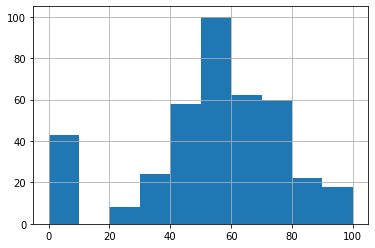

In [15]:
stud.score.hist()

#### Наши данные уже начали приобретать какой то смысл и исходя с графика гистограммы можно наблюдать что присутствуют ученики которые получили 0 баллов за экзамен, можно предположить что они либо не явились либо опоздали либо небыли допущены. давайте взглянем на эти значения более детально и посчитаем какой процент учеников попали в эту ситуацию: 

In [16]:
nullpoint = len(stud.loc[stud.score == 0])
print('Кол-во учащихся с 0 баллов {} это {}% от всех учащихся'.format(nullpoint, round(nullpoint / len(stud) * 100, 2)))

Кол-во учащихся с 0 баллов 43 это 10.89% от всех учащихся


In [17]:
stud.loc[stud.score == 0]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


#### Очень стало интересно  от чего же  так много  ребят  не прошли  и не  получили  оценки я попытался разобраться:

Взглянув  на  прогулы  обнаружил  2  заядлых  прогульщика и 2 ученика  с  низкой  успеваемостью видимо  как  раз из за пропущенных  занятиях

In [18]:
nullp = stud[stud['score'] == 0]
nullp = nullp.absences 
nullp.value_counts()

0.0    37
8.0     1
3.0     1
4.0     1
6.0     1
Name: absences, dtype: int64

Далее я решил взглянуть на тепловую карту этих учеников коррелировав их данные между собой:

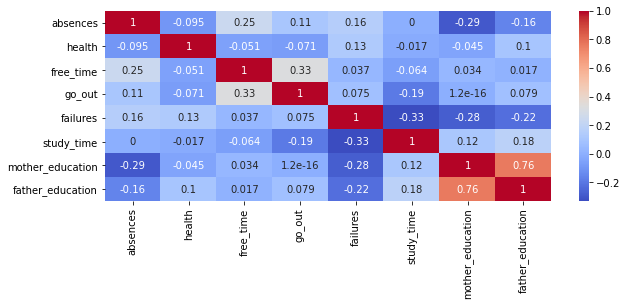

In [19]:
plt.figure(figsize=(10,3.5))
nullp1 = stud[stud['score'] == 0]
nullp1 = nullp1[['absences','health','free_time','go_out','failures','study_time','mother_education','father_education']].corr()
sns.heatmap(nullp1, annot=True, cmap='coolwarm')


#### Не сильно информативно получились данные но готов предположить что большая часть очень много проводила с друзьями имело достаточно свободного времени соответственно прогуливали занятия. Я соотнес это к неблагоприятным семьям у которых родители имели низкое образование как у отца так и у матери.
#### Но в целом данные очень плавают и как их более точно интерпретировать пока не имеет смысла ... но можно создать новые признаки и провести какие то аналогии.

продолжим дальнейшее рассмотрение признаков и их описанию в частности

### Age
возраст  ученика 15-22

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Уникальные значения данных для колоннки "age": [18 17 15 16 19 22 20 21]

Неинформативные данные для критерия "age" отсутствуют.

Корреляция со столбцом "score" -0.18636493461204273


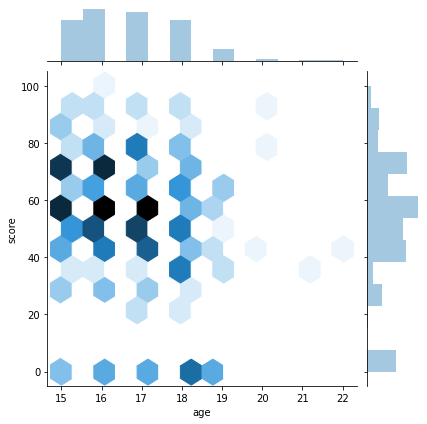

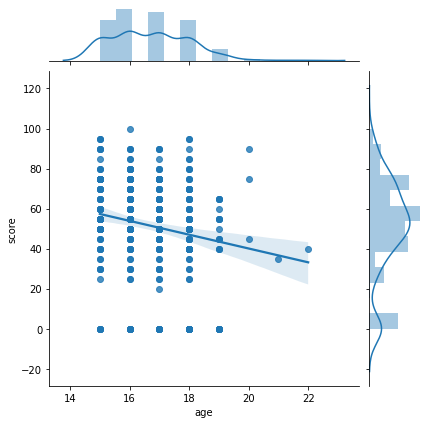

In [20]:
desnum(stud.age, hist=True, corr=True)

#### Как можем наблюдать на графиках визуально и из коэффициента  корреляции с возрастом успеваемость падает.

### father_education

образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: father_education, dtype: float64

Уникальные значения данных для колоннки "father_education": [ 4.  1.  2.  3. 40. nan  0.]

Записи без данных в графе "father_education": 24

Неинформативные данные для критерия "father_education"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0



Корреляция со столбцом "score" 0.0878900712099219


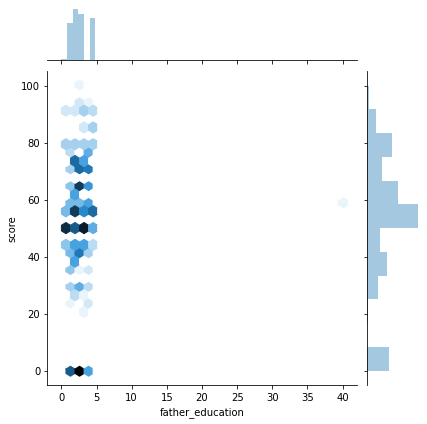

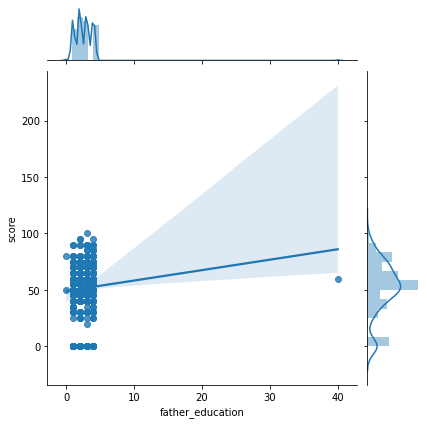

In [21]:
desnum(stud.father_education, hist=True, corr=True)

Тут на  графике  видим  явный  выброс посмотрим на него в  частности  и  примем решение что  с ним делать.

In [22]:
stud.loc[stud.father_education >= 40]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


рассмотрев  все более детально  прихожу к  выводу что  это опечатка  так как  опекун  у  ученика является отец, заменим его на 4.0

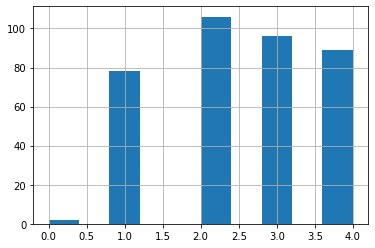

In [23]:
# Замена  опечатки  в   колонке father_education
stud.father_education = stud.father_education.replace(40, 4.0)
stud.father_education.hist()

убедившись что  мы заменили выброс взглянем на  графики еще  раз

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: father_education, dtype: float64

Уникальные значения данных для колоннки "father_education": [ 4.  1.  2.  3. nan  0.]

Записи без данных в графе "father_education": 24

Неинформативные данные для критерия "father_education"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0



Корреляция со столбцом "score" 0.14723730931795206


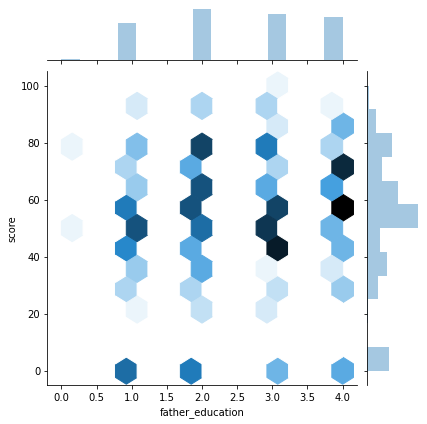

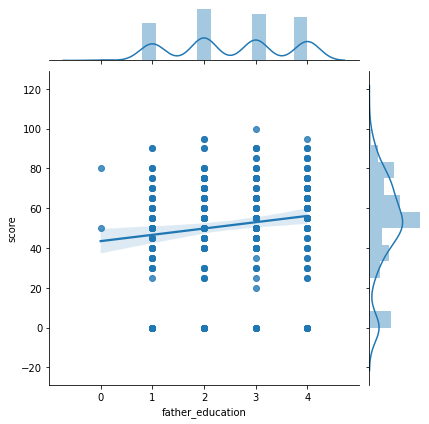

In [24]:
desnum(stud.father_education, hist=True, corr=True)

#### Как можем наблюдать на графиках визуально и из коэффициента корреляции об образовании отца:
* Достаточно положительно образование отца которым они обладают влияет  на успеваемость ученика

### mother_education
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_education, dtype: float64

Уникальные значения данных для колоннки "mother_education": [ 4.  1.  3.  2. nan  0.]

Записи без данных в графе "mother_education": 3

Неинформативные данные для критерия "mother_education"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0



Корреляция со столбцом "score" 0.23662423923930107


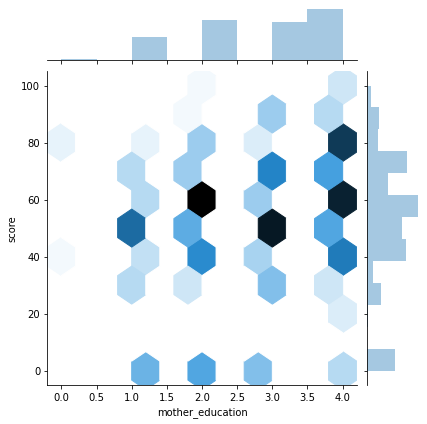

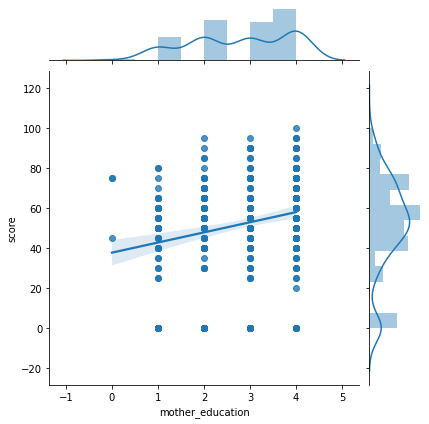

In [25]:
desnum(stud.mother_education, hist=True, corr=True)

#### Как можем наблюдать на графиках визуально и из коэффициента корреляции об образовании матери:
* Достаточно положительно образование матери которым они обладают влияет на успеваемость ученика
* В визуальном сравнении видно  что образование матери дает чуть больший прирост успеваемости ученика чем образование отца

### travel_time
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

Уникальные значения данных для колоннки "travel_time": [ 2.  1.  3. nan  4.]

Записи без данных в графе "travel_time": 28

Неинформативные данные для критерия "travel_time"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,-3.0,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0



Корреляция со столбцом "score" -0.0790501646717731


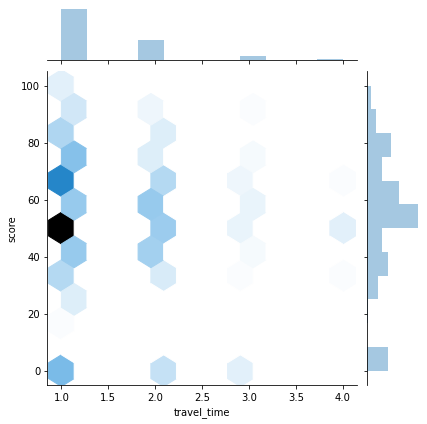

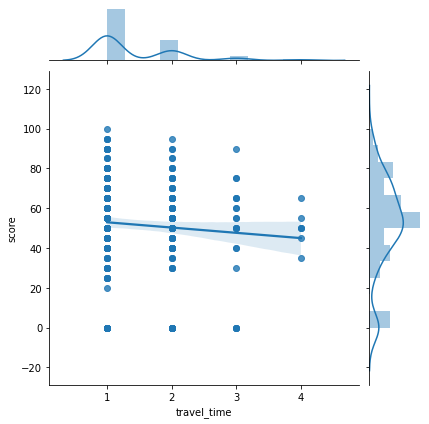

In [26]:
desnum(stud.travel_time, hist=True, corr=True)

### В данных есть пропуски, заполнить их нет возможности.

### Взглянув на график и коэффициент корреляции приходим к следующим выводам:
* Большинство учащихся и даже  те которые  живут  за  городом тратят  не  более 15  мин нахождения в пути до  места учебы 
* Длительные нахождения в  пути изматывает и  негативно сказывается на успеваемость в целом  

### study_time
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

Уникальные значения данных для колоннки "study_time": [ 2.  3.  1. nan  4.]

Записи без данных в графе "study_time": 7

Неинформативные данные для критерия "study_time"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0



Корреляция со столбцом "score" 0.10602189417427527


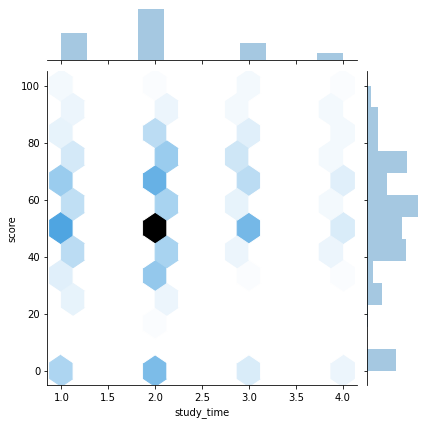

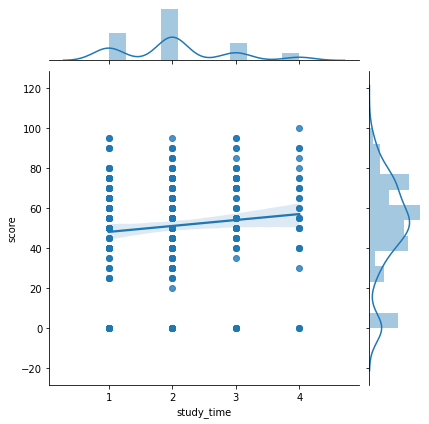

In [27]:
desnum(stud.study_time, hist=True, corr=True)

### Как можем наблюдать на графиках визуально и из коэффициента корреляции затраченного времени на учебу по мимо школы:
* многие учащиеся уделяют больше времени на обучение в не школьное время от 2 до 5 часов.
* соответственно увеличение времени на доп.обучение дают положительные результаты на госэкзамене.

### study_time_granular
описание признака отсутствует.
есть подозрения что он связан с вышеупомянутым study_time взглянем на  их гистограммных

#### создадим  переменную  с  названиями этих  колонок  для  построения гистограмм 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0D1828F10>,
      dtype=object)

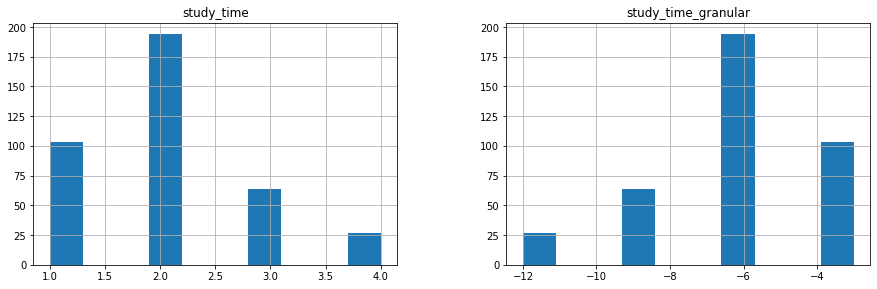

In [28]:
studyhist = ['study_time', 'study_time_granular']
stud[studyhist].hist(layout=(8, 2), figsize=(15, 45), bins=10)

мы видим что  они  прямо пропорциональны друг другу  давайте взглянем проверим коррелируют  ли они.

(-0.9999999999999998,)


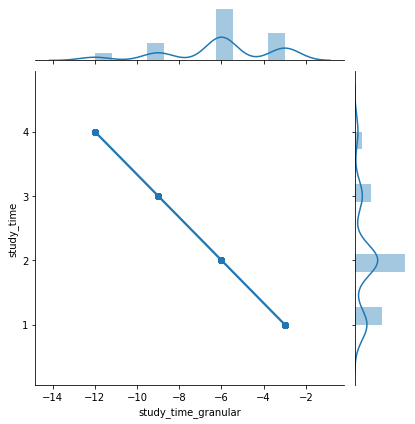

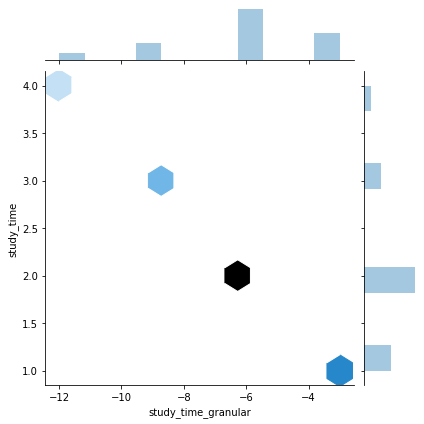

In [29]:
studycorr = stud.study_time.corr(stud.study_time_granular), 
print(studycorr)
sns.jointplot(x = 'study_time_granular', y = 'study_time', data = stud, kind = 'reg')
sns.jointplot(x = 'study_time_granular', y = 'study_time', data = stud, kind = 'hex')

### Делаем вывод что  это зеркальная корреляция признака  study_time и ее можно  удалить 

In [30]:
stud.drop(['study_time_granular'], inplace = True, axis = 1)
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   395 non-null    object 
 1   sex                      395 non-null    object 
 2   age                      395 non-null    int64  
 3   address                  378 non-null    object 
 4   family_size              368 non-null    object 
 5   parents_status           350 non-null    object 
 6   mother_education         392 non-null    float64
 7   father_education         371 non-null    float64
 8   mother_job               376 non-null    object 
 9   father_job               359 non-null    object 
 10  school_selection_reason  378 non-null    object 
 11  guardian                 364 non-null    object 
 12  travel_time              367 non-null    float64
 13  study_time               388 non-null    float64
 14  failures                 3

###  failures
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Уникальные значения данных для колоннки "failures": [ 0.  3. nan  2.  1.]

Записи без данных в графе "failures": 22

Неинформативные данные для критерия "failures"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0



Корреляция со столбцом "score" -0.35376343659327697


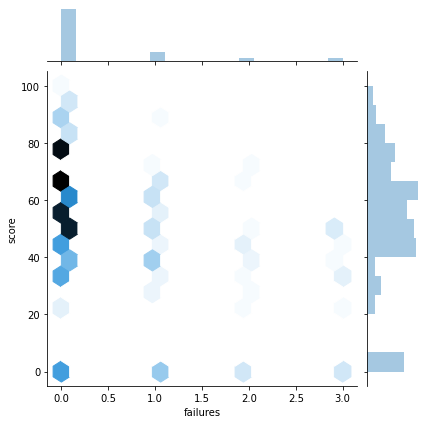

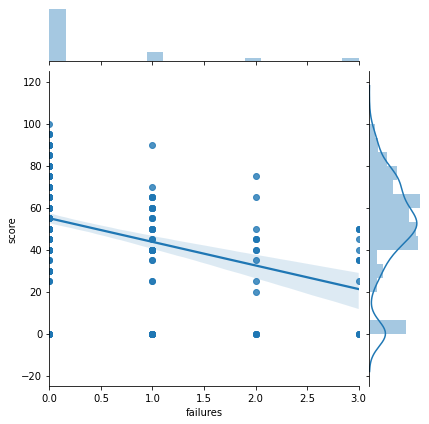

In [31]:
desnum(stud.failures, hist=True, corr=True)

### Интересный признак  который разлагает настрой и имеет высокую корреляцию -0.35376343659327697 что  отрицательно влияет на успеваемость и в  итоге  негативно сказывается на госэкзамене

### family_relations
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relations, dtype: float64

Уникальные значения данных для колоннки "family_relations": [ 4.  5.  3. nan -1.  2.  1.]

Записи без данных в графе "family_relations": 27

Неинформативные данные для критерия "family_relations"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0



Корреляция со столбцом "score" 0.03912249301503962


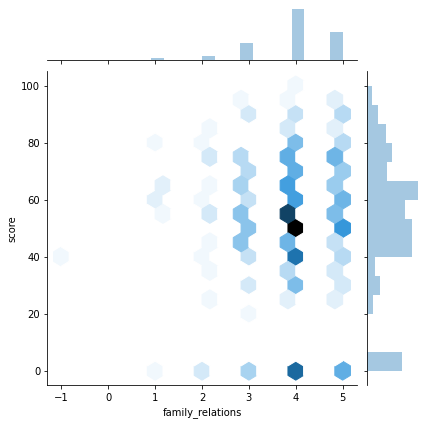

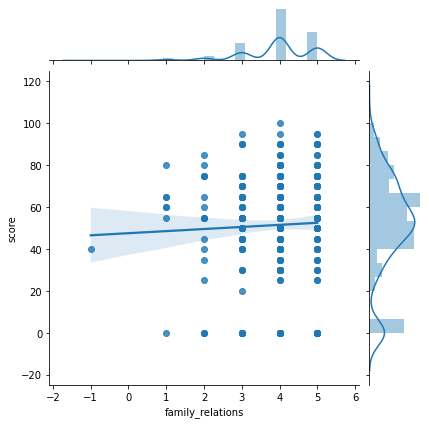

In [32]:
desnum(stud.family_relations, hist=True, corr=True)

На графике четко виден выброс со значением -1, взглянем на него внимательнее.

In [33]:
 stud.loc[stud.family_relations == -1]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Судя по  данным по учащимуся все  данные заполненны  скорее всего  этот  выброс является опечаткой

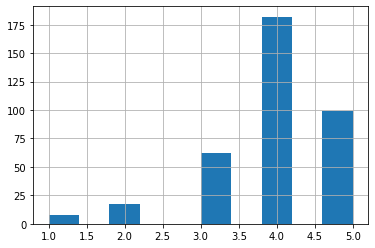

In [34]:
# Замена  опечатки  в   колонке family_relations
stud.family_relations = stud.family_relations.replace(-1, 1)
stud.family_relations.hist() # Взглянем на гистограмму вступили ли  значения в  силу

Рассмотрим этот  вид  данных снова

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relations, dtype: float64

Уникальные значения данных для колоннки "family_relations": [ 4.  5.  3. nan  1.  2.]

Записи без данных в графе "family_relations": 27

Неинформативные данные для критерия "family_relations"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0



Корреляция со столбцом "score" 0.03720310203487125


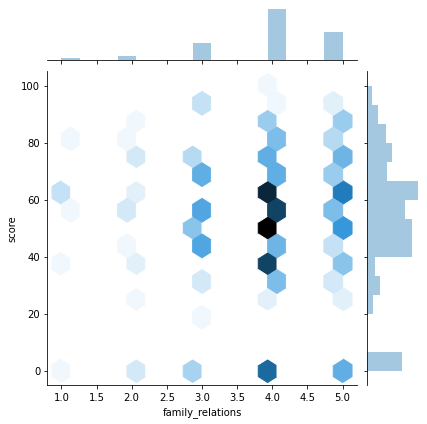

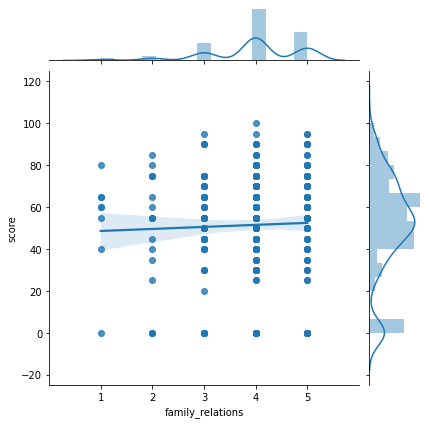

In [35]:
desnum(stud.family_relations, hist=True, corr=True)

### Как можем наблюдать на графиках визуально и из коэффициента корреляции о  семейных отношениях
* они на  прямую связанны с успеваемостью на  госэкзаменах 
* судя по оценкам среди учащихся  по  большей части складываются хорошее отношения внутри семьи 

### free_time
свободное время после школы (от 1 - очень мало до 5 - очень много)

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

Уникальные значения данных для колоннки "free_time": [ 3.  2.  4.  1.  5. nan]

Записи без данных в графе "free_time": 11

Неинформативные данные для критерия "free_time"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,0.0
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,0.0
290,GP,M,18,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,NaN,services,reputation,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0



Корреляция со столбцом "score" 0.00040707127996357555


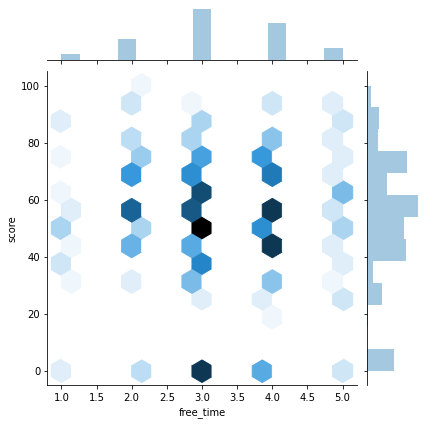

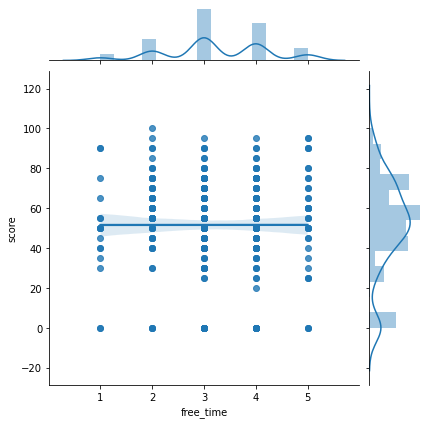

In [36]:
desnum(stud.free_time, hist=True, corr=True)

### Как можем наблюдать на графиках визуально и из коэффициента корреляции о  свободном времени:
* делаем вывод что они не сильно загружены
* это время  можно было потратить на дополнительную подготовку  тем самым сделать  этот  признак более значимым

### go_out
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

Уникальные значения данных для колоннки "go_out": [ 4.  3.  2.  1.  5. nan]

Записи без данных в графе "go_out": 8

Неинформативные данные для критерия "go_out"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,NaN,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,NaN,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,0.0
322,GP,F,17,R,LE3,T,2.0,2.0,services,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0



Корреляция со столбцом "score" -0.14785273060357404


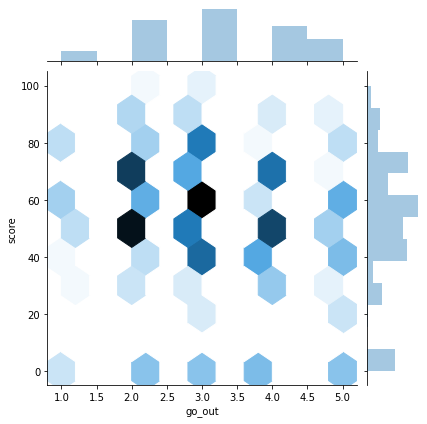

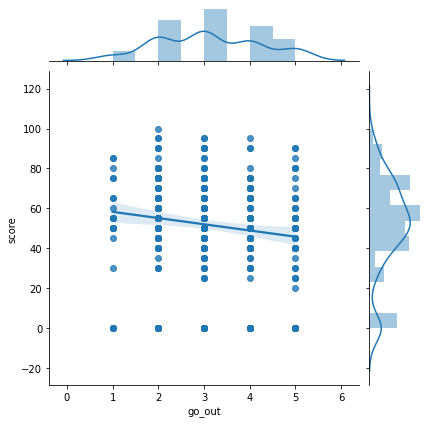

In [37]:
desnum(stud.go_out, hist=True, corr=True)

### Как можем наблюдать на графиках визуально и из коэффициента корреляции о  проведении времени  с друзьями:
* большинство учащихся проводят достаточно много времени общаясь с друг другом
* время проведенное с друзьями пагубно сказывается на успеваемости при  количестве  его  переизбытка 

### health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Уникальные значения данных для колоннки "health": [ 3.  5.  1.  2.  4. nan]

Записи без данных в графе "health": 15

Неинформативные данные для критерия "health"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
55,GP,F,16,U,GT3,A,2.0,1.0,other,other,other,mother,1.0,2.0,0.0,no,no,yes,yes,yes,yes,yes,yes,5.0,3.0,4.0,NaN,8.0,50.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
208,GP,F,16,U,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,1.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,NaN,6.0,50.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
236,GP,M,17,U,LE3,T,2.0,NaN,other,other,home,father,1.0,2.0,NaN,no,no,NaN,yes,no,yes,yes,yes,4.0,4.0,2.0,NaN,4.0,65.0



Корреляция со столбцом "score" -0.07085353439719329


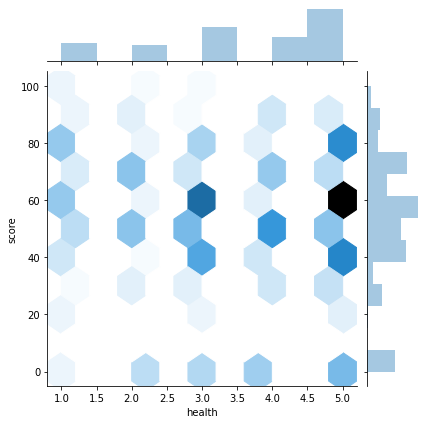

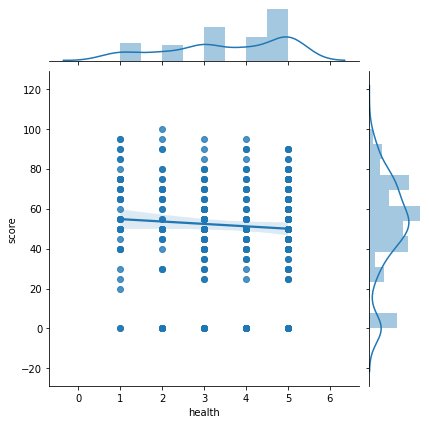

In [38]:
desnum(stud.health, hist=True, corr=True)

### Как можем наблюдать на графиках визуально и из коэффициента корреляции о  здоровье:
* Их среднее состояние вполне стабильное
* имеются пропуски в значениях, но исходя из  пропусков и их соотношения к итоговой оценке за госэкзамен  у некоторых  учащихся оценки вполне высокие
* учащиеся которые больше болеют успеваемость выше, скорее всего из-за того, что находясь дома они уделяют больше времени самообразованию.

### absences
количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Уникальные значения данных для колоннки "absences": [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]

Записи без данных в графе "absences": 12

Неинформативные данные для критерия "absences"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0



Корреляция со столбцом "score" 0.06697062994662219


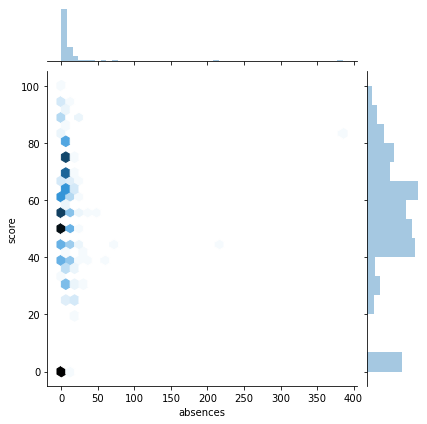

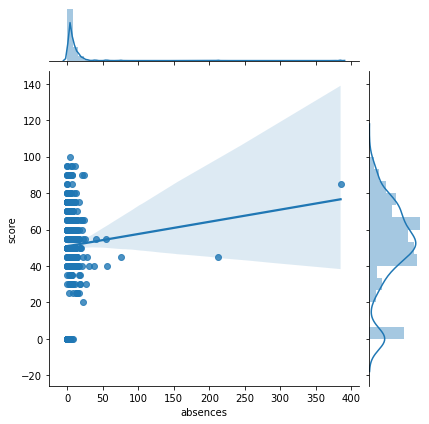

In [39]:
desnum(stud.absences, hist=True, corr=True)

### В глаза  бросаются 2 выброса нужно  снова рассмотреть их  детально

In [40]:
stud.loc[(stud.absences == 212) | (stud.absences == 385)]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [41]:
# Замена  опечатки  в   колонке absences
stud.absences = stud.absences.replace(385, 38.5)
stud.absences = stud.absences.replace(212, 21.2)

рассмотрим  повторно  таблицу  пропусков.

count    383.000000
mean       5.876501
std        8.276385
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

Уникальные значения данных для колоннки "absences": [ 6.   4.  10.   2.   0.  16.   nan 14.   7.   8.  25.  12.  54.  18.
 26.  20.  56.  24.  28.   5.  13.  15.  22.   3.  38.5 21.   1.  75.
 30.  19.   9.  11.  38.  40.  23.  17.  21.2]

Записи без данных в графе "absences": 12

Неинформативные данные для критерия "absences"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0



Корреляция со столбцом "score" 0.048779711577014814


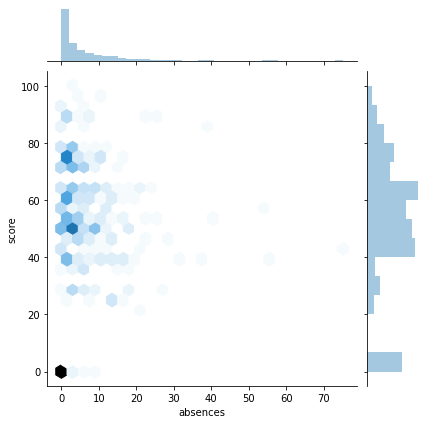

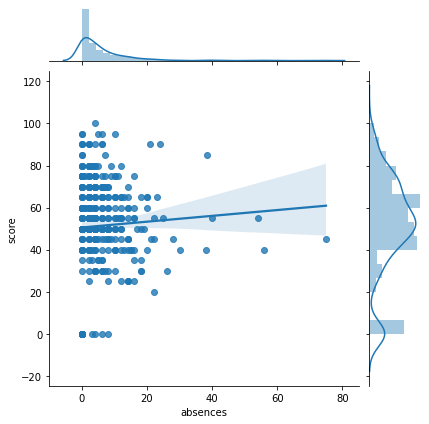

In [42]:
desnum(stud.absences, hist=True, corr=True)

Странно... количество пропусков улучшает успеваемость.
Попробуем связать с другими признаками. 
Причиной пропуска может быть:
* Прогулы
* Плохое семейные отношения (family_relations)
* здоровье (health)
* время в пути, ученик опаздывает (travel_time)
* романтические отношения (romantic)


Попробуем разобраться с чем коррелирует количество пропусков.
Взглянем на границы выбросов

In [43]:
show_outliners()

age {'left': 13.0, 'right': 21.0}
mother_education {'left': -1.0, 'right': 7.0}
father_education {'left': 0.5, 'right': 4.5}
travel_time {'left': -0.5, 'right': 3.5}
study_time {'left': -0.5, 'right': 3.5}
failures {'left': 0.0, 'right': 0.0}
family_relations {'left': 2.5, 'right': 6.5}
free_time {'left': 1.5, 'right': 5.5}
go_out {'left': -1.0, 'right': 7.0}
health {'left': 0.0, 'right': 8.0}
absences {'left': -12.0, 'right': 20.0}
score {'left': -5.0, 'right': 115.0}


absences {'left': -12.0, 'right': 20.0}
в  связи с этим реконструируем нашу график в рамках этих значений

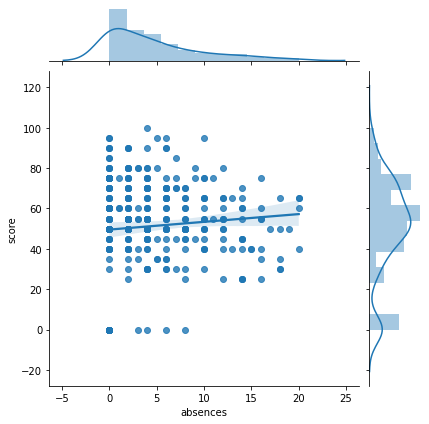

In [44]:
newabsences = stud.loc[stud.absences <=20]
sns.jointplot(x='absences', y='score', data=newabsences, kind='reg')

существенных изменений мы не наблюдаем, посмотрим на другие данные влияний относительно  пропусков:

In [45]:
stud.corr()['absences'].sort_values()

family_relations   -0.068818
study_time         -0.066787
free_time          -0.061084
travel_time        -0.023879
health             -0.023608
go_out              0.020022
father_education    0.042018
score               0.048780
failures            0.074137
mother_education    0.084135
age                 0.168133
absences            1.000000
Name: absences, dtype: float64

проведя не мало времени над  этой головоломкой  я пришел к личному выводу о котором напишу далее...

### Как можем наблюдать на графиках визуально и из коэффициента корреляции о пропущенных занятиях:
* Каким то образом  пропуски  положительно  влияют на  общую тенденцию успеваемости
* имеются  пропуски
* касательно пустых значений  рисуется не  полная картина, наблюдая их состояние здоровья у учеников которых пропущены эти  значения происходит некая коллизия 
* а наблюдая весь дата сет  закрадываются в голову сомнения о  его достоверности 
* ученики имея плохое состояние здоровья  не  имеют ни  одного пропуска и проводят экзамен на  отлично  набирая 95 баллов
* как нам известно это  может работать в обратном  порядке  когда  здоровье  отличное, иметь много пропусков "прогулов" и иметь соответствующую оценку в районе 50  баллов.
* делаю вывод что  это очень важный признак но как таковых выводов на нем сейчас делать не представляется возможным в связи не добросовестным сбором данных который вводит в  заблуждение
### ниже предоставлю  визуальный пример  как весьма 2 больных ученика не имеет ни 1 пропуска и сдают на 95 баллов

In [46]:
stud.loc[(stud.score == 95)] 

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
113,GP,M,15,U,LE3,T,4.0,2.0,teacher,other,course,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,yes,no,3.0,5.0,2.0,3.0,10.0,95.0
286,GP,F,18,U,GT3,T,2.0,NaN,at_home,at_home,other,mother,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,3.0,2.0,5.0,95.0
374,MS,F,18,R,LE3,T,4.0,NaN,other,NaN,reputation,mother,2.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,95.0


## Взглянем еще раз на гистограммы  перед тем как  перейти к категориальным признакам что бы  удостовериться что мы ничего не пропустили

Числовые признаки:
 ['age' 'mother_education' 'father_education' 'travel_time' 'study_time'
 'failures' 'family_relations' 'free_time' 'go_out' 'health' 'absences'
 'score']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0D2DB7DC0>,
      dtype=object)

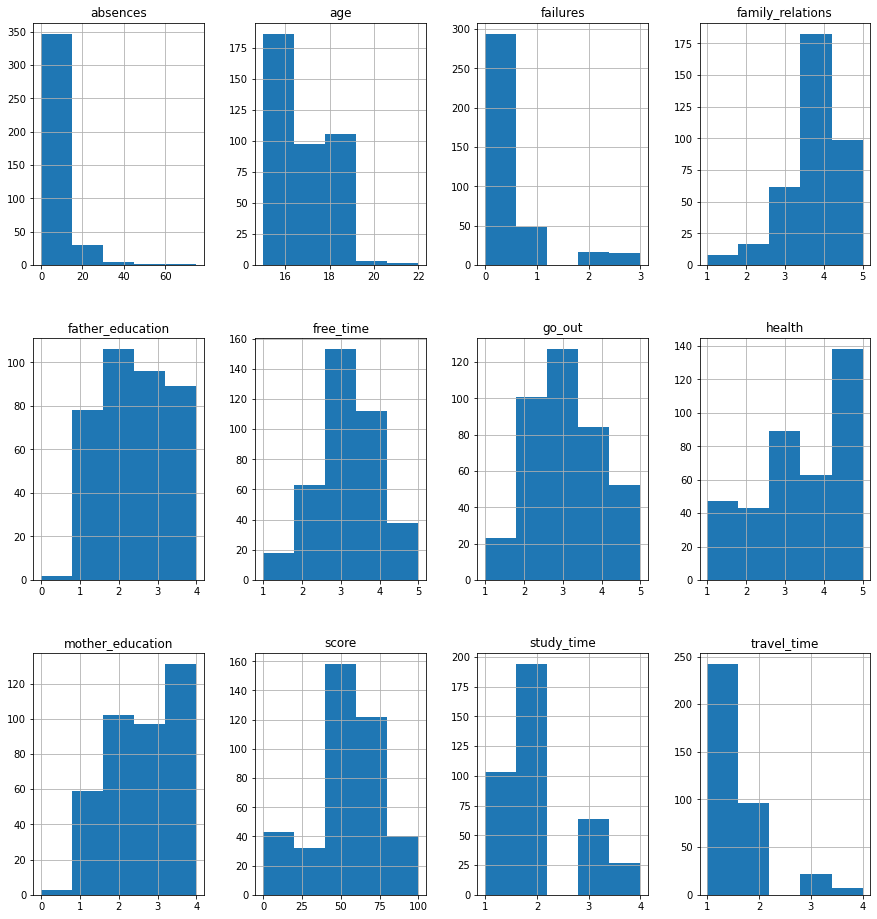

In [47]:
numcol = stud.select_dtypes(include=['int64', 'float64']).columns
print('Числовые признаки:\n', numcol.values) # повторим действие так как мы удалили  обин из признаков

stud[numcol].hist(layout=(8, 4), figsize=(15, 45), bins=5)

## Вроде ни чего  не пропустили  и каждый признак описали и привели в  порядок, чуть  позже выявим числовые признаки, оказывающие наибольшее влияние на конечный балл учащегося.


# Первичный анализ данных в столбцах: категориальные признаки

### school
аббревиатура школы, в которой учится учащийся


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object
GP    349
MS     46
Name: school, dtype: int64

Неинформативные данные для критерия "school" отсутствуют.


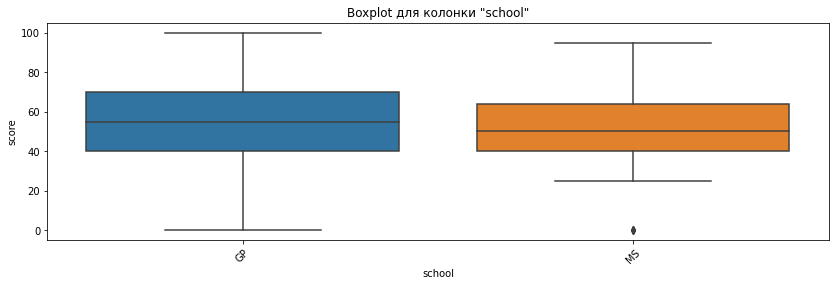

In [48]:
desnom(stud.school)

##### Судя по данным большинство учащихся сдали госэкзамен из школы с аббревиатурой GP, остальные из MS

### sex
пол ученика ('F' - женский, 'M' - мужской)

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object
F    208
M    187
Name: sex, dtype: int64

Неинформативные данные для критерия "sex" отсутствуют.


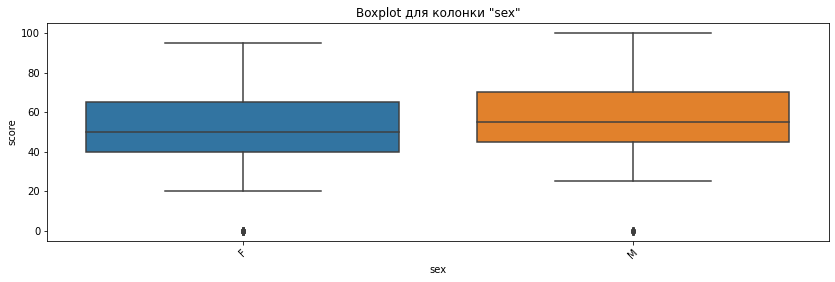

In [49]:
desnom(stud.sex)

##### Мне кажется слова из песни что  на каждые 10  девчонок по  статистике 9 ребят  здесь очень уместно )
* (187/208)=0.8990384615384616
* А успеваемость у  мальчишек выше

## address
тип адреса ученика ('U' - городской, 'R' - за городом)

count     378
unique      2
top         U
freq      295
Name: address, dtype: object
U    295
R     83
Name: address, dtype: int64

Записи без данных в графе "address": 17

Неинформативные данные для критерия "address"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,0.0


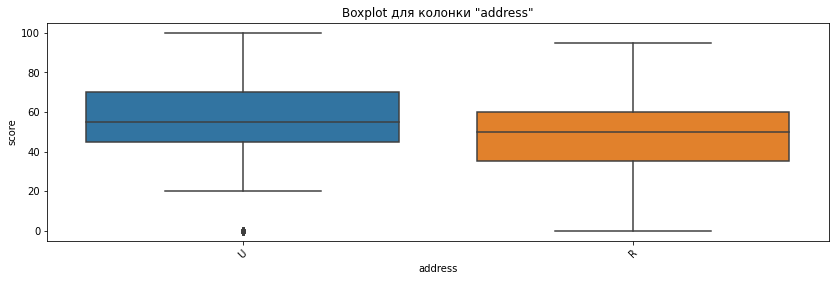

In [50]:
desnom(stud.address)

##### в колонке есть пропуски проведя  пару тестов понял что  каким то  образом  учащиеся  даже те  которые живут  за  городом  добираются до школы достаточно быстро в  сравнении  с теми  что живут в  городе! это  снова наводит на  странные мысли

##### Исходя из данных:
* Большинство учащихся проживают в городе
* Успеваемость у учащихся живущих в городе выше чем у  проживающих за городом.

### family_size
размер семьи('LE3' <= 3, 'GT3' >3)

count     368
unique      2
top       GT3
freq      261
Name: family_size, dtype: object
GT3    261
LE3    107
Name: family_size, dtype: int64

Записи без данных в графе "family_size": 27

Неинформативные данные для критерия "family_size"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0


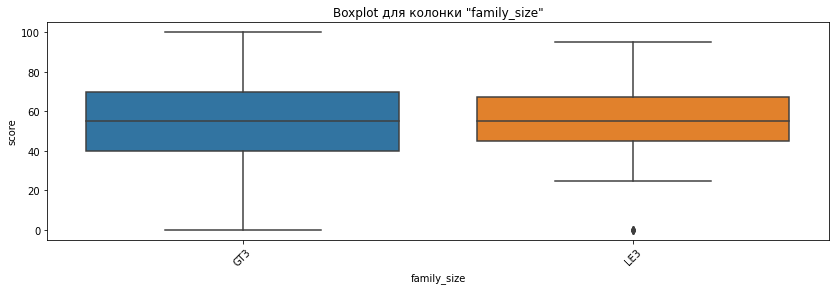

In [51]:
desnom(stud.family_size)

##### По данным, приведенным в колонке можно сделать вывод, что большинство семей состоят более чем из 3 человек

### parents_status
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

count     350
unique      2
top         T
freq      314
Name: parents_status, dtype: object
T    314
A     36
Name: parents_status, dtype: int64

Записи без данных в графе "parents_status": 45

Неинформативные данные для критерия "parents_status"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,GP,F,15,U,GT3,NaN,2.0,4.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,1.0,2.0,2.0,5.0,14.0,40.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


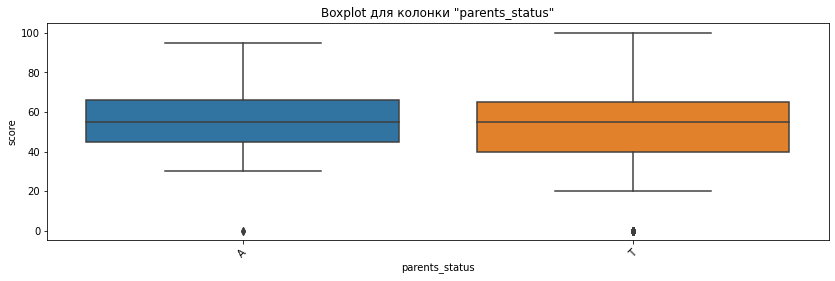

In [52]:
desnom(stud.parents_status)

##### В колонке  достаточно много пропусков, заполнить их нет возможности, но и отбрасывать тоже не будем.
##### Большинство учащихся живут в полноценных семьях.

### mother_job
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

count       376
unique        5
top       other
freq        133
Name: mother_job, dtype: object
other       133
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

Записи без данных в графе "mother_job": 19

Неинформативные данные для критерия "mother_job"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,NaN,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


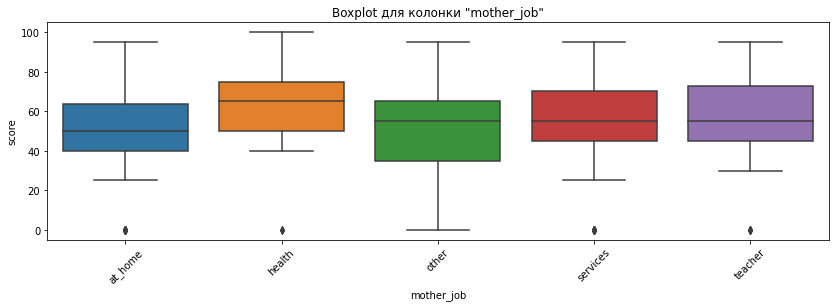

In [53]:
desnom(stud.mother_job)

##### В  колонке 376 записей из  них 133 записи с  пометкой Other   что не несет в себе  ни какой информации,поэтому в  следствии этого скорее всего ее придется исклчить.

### father_job
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

count       359
unique        5
top       other
freq        197
Name: father_job, dtype: object
other       197
services    102
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

Записи без данных в графе "father_job": 36

Неинформативные данные для критерия "father_job"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


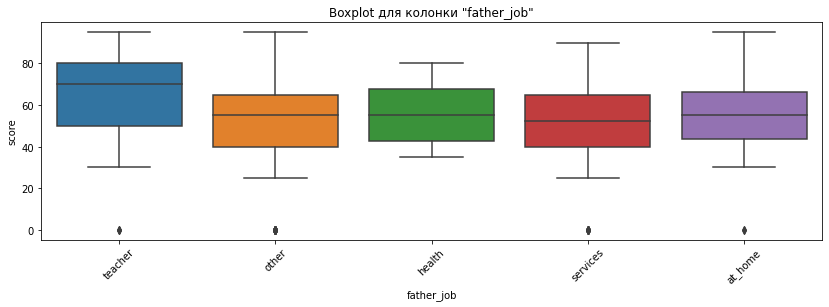

In [54]:
desnom(stud.father_job)

##### В  колонке 359 записей из  них 197 записи с  пометкой Other   что не несет в себе  ни какой информации ,поэтому в  следствии этого скорее всего ее придется исключить.

### school_selection_reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

count        378
unique         4
top       course
freq         137
Name: school_selection_reason, dtype: object
course        137
home          104
reputation    103
other          34
Name: school_selection_reason, dtype: int64

Записи без данных в графе "school_selection_reason": 17

Неинформативные данные для критерия "school_selection_reason"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,NaN,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0


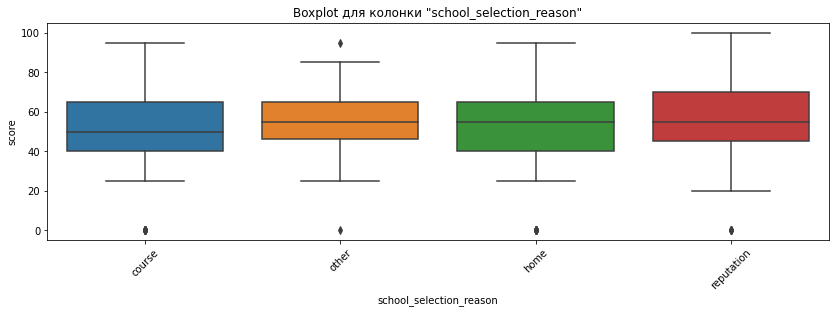

In [55]:
desnom(stud.school_selection_reason)

##### Сложно что  либо сказать о причине  выбора школы  здесь значения  почти все равны, но  можно  отметить то  что  ученики с высокой успеваемостью выбрали школу из за ее репутации 


### guardian
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object
mother    250
father     86
other      28
Name: guardian, dtype: int64

Записи без данных в графе "guardian": 31

Неинформативные данные для критерия "guardian"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


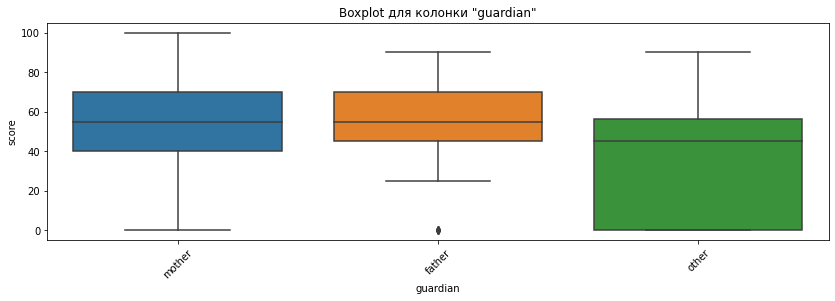

In [56]:
desnom(stud.guardian)

##### Наглядно видно  что опекуном по  большей части из  всех учащихся является мать в кол-ве  250 учащихся, опекун в лице  отца всего лишь в кол-ве 86 учащихся, так же  с графика бросается колонка other  в кол-ве 28 учащихся  видимо  по какой то  причине они не имеют ни отца и  матери но это очень сильно оказывается на госэкзамене.


### school_support
дополнительная образовательная поддержка (yes или no)

count     386
unique      2
top        no
freq      335
Name: school_support, dtype: object
no     335
yes     51
Name: school_support, dtype: int64

Записи без данных в графе "school_support": 9

Неинформативные данные для критерия "school_support"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,NaN,father,1.0,1.0,0.0,NaN,no,no,no,yes,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


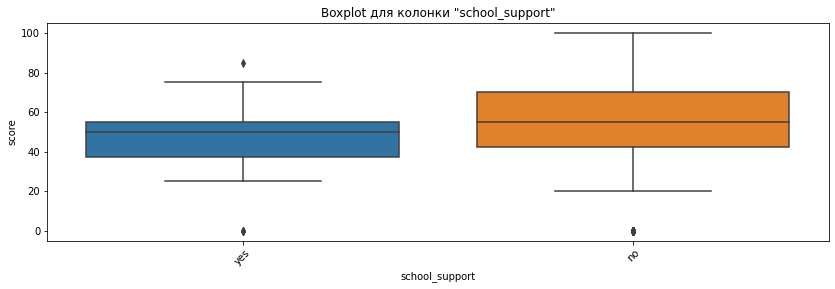

In [57]:
desnom(stud.school_support)

##### На этой позиции отчётливо  ясно что дополнительная образовательная поддержка   необходима учащимся  которые нуждаются в том что бы  подтянуть успеваемость по предмету  это  отчетливо  видно  что подтверждающие ученики  свое отношение к дополнительной образовательной поддержке  имеют не высокий итоговый бал на госэкзамене.

### family_support
семейная образовательная поддержка (yes или no)

count     356
unique      2
top       yes
freq      219
Name: family_support, dtype: object
yes    219
no     137
Name: family_support, dtype: int64

Записи без данных в графе "family_support": 39

Неинформативные данные для критерия "family_support"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0


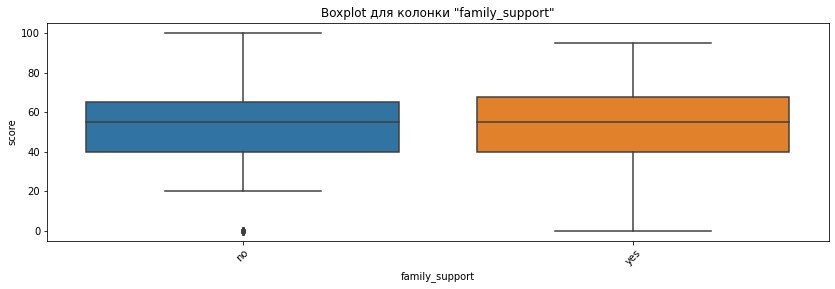

In [58]:
desnom(stud.family_support)

##### Большинство учащихся получает образовательную поддержку дома, но сказать что  это оказывает влияние на итоговый балл пока что сложно 

### paid
дополнительные платные занятия по математике (yes или no)

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object
no     200
yes    155
Name: paid, dtype: int64

Записи без данных в графе "paid": 40

Неинформативные данные для критерия "paid"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


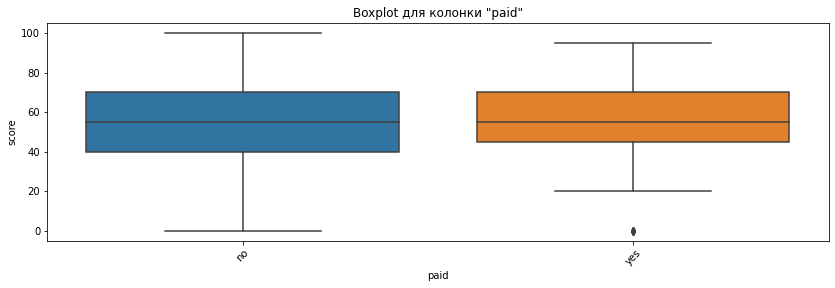

In [59]:
desnom(stud.paid)

##### Чуть меньше половины  пользуются  услугами репетитора, но из тех кто все же  прибегают к их услугам  итоговый результат выше в самой группе в  сравнении с той группой которая не прибегает к услугам репетитора внутри этой группы  примерно одинаковое кол-во учащихся чья оценка выше или ниже средней оценки учащихся внутри этой группы 

### activities
дополнительные внеучебные занятия (yes или no)

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object
yes    195
no     186
Name: activities, dtype: int64

Записи без данных в графе "activities": 14

Неинформативные данные для критерия "activities"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
116,GP,M,15,U,GT3,T,4.0,4.0,other,teacher,reputation,father,2.0,2.0,0.0,no,yes,no,NaN,yes,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,yes,no,no,NaN,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,NaN,course,mother,NaN,1.0,2.0,no,no,no,NaN,yes,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0


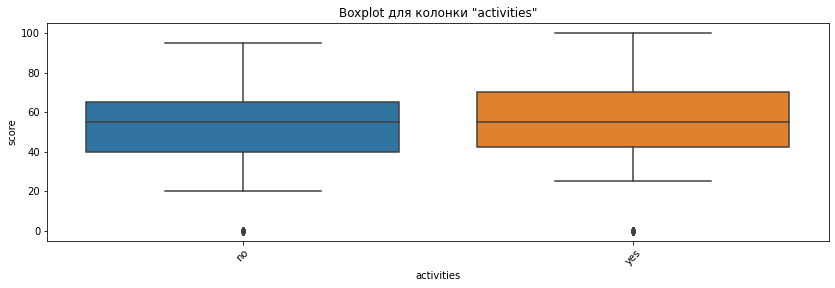

In [60]:
desnom(stud.activities)

##### Количество учащихся имеющих и не имеющих дополнительные внеучебные занятия кроме школы почти равны. В тоже время учащиеся давшие утвердительный ответ показывают более высокую успеваемость. Смею предположить что  эти учащиеся более организованны в своей личной жизни в следствии чего их успеваемость выше. 

### nursery
посещал детский сад (yes или no)

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object
yes    300
no      79
Name: nursery, dtype: int64

Записи без данных в графе "nursery": 16

Неинформативные данные для критерия "nursery"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,NaN,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,NaN,NaN,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
332,GP,F,18,U,GT3,T,3.0,3.0,services,services,home,mother,1.0,2.0,0.0,no,no,no,yes,NaN,yes,yes,no,5.0,3.0,4.0,4.0,0.0,0.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0


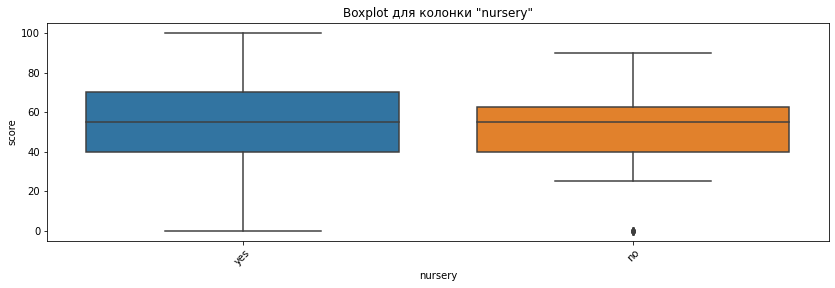

In [61]:
desnom(stud.nursery)

##### В этом  признаке наглядно видно  что  кол-во в  числе 300 учащихся  посещавшие детский сад успеваемость  выше чем  у кол-ва в числе   79 учащихся которые не посещали детский сад, думаю это связанно  с тем что   развитие этих детей и приспособленность к социальной жизни выше чем у тех кто развивался в не детского сада. 


### higher
хочет получить высшее образование (yes или no)

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object
yes    356
no      19
Name: higher, dtype: int64

Записи без данных в графе "higher": 20

Неинформативные данные для критерия "higher"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,yes,no,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
149,GP,M,15,U,LE3,NaN,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
158,GP,M,16,R,GT3,NaN,2.0,2.0,at_home,other,course,mother,3.0,1.0,NaN,no,no,no,no,no,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,NaN,no,yes,no,yes,no,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


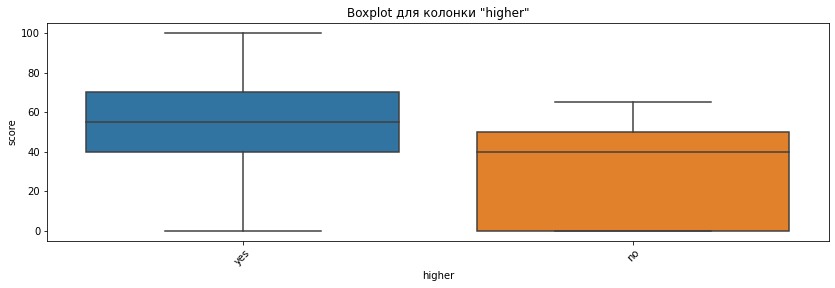

In [62]:
desnom(stud.higher)

##### Этот признак явно утверждает что учащиеся которые ставили перед собой цель получить высшее образование  по итогу дают результат выше на госэкзамене  чем в случае с учащимися которые такой поставленной цели не имели.

### internet
наличие интернета дома (yes или no)

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object
yes    305
no      56
Name: internet, dtype: int64

Записи без данных в графе "internet": 34

Неинформативные данные для критерия "internet"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,GP,M,15,U,GT3,T,2.0,3.0,other,services,course,father,1.0,1.0,0.0,yes,yes,yes,yes,no,yes,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0
86,GP,F,16,U,LE3,T,2.0,2.0,at_home,other,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,NaN,no,4.0,3.0,4.0,2.0,4.0,30.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
117,GP,M,16,U,GT3,T,3.0,3.0,other,services,home,father,2.0,1.0,0.0,no,no,no,yes,yes,yes,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


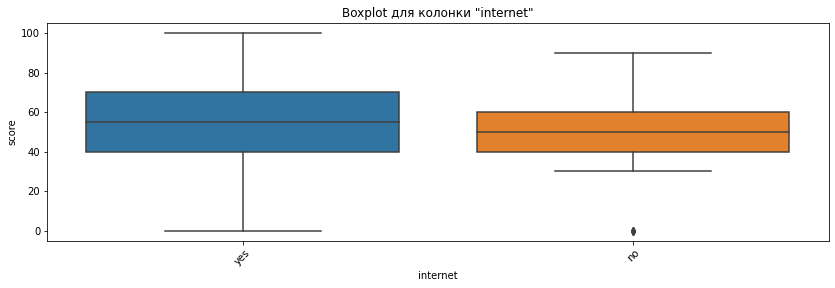

In [63]:
desnom(stud.internet)

##### Очевидно что с  приходом интернета в жизнь стало проще владеть и искать какую то  информативную часть касательно учебных материалов, в связи с этим можно смело утверждать что  успеваемость на госэкзамене у этих учащихся выше несмотря на подавляющее большинство в соотношении тех ребят у которого его нет.

### romantic
в романтических отношениях (yes или no)


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object
no     240
yes    124
Name: romantic, dtype: int64

Записи без данных в графе "romantic": 31

Неинформативные данные для критерия "romantic"


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,school_selection_reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
13,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,NaN,5.0,4.0,3.0,3.0,2.0,55.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,other,mother,1.0,2.0,0.0,no,NaN,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0


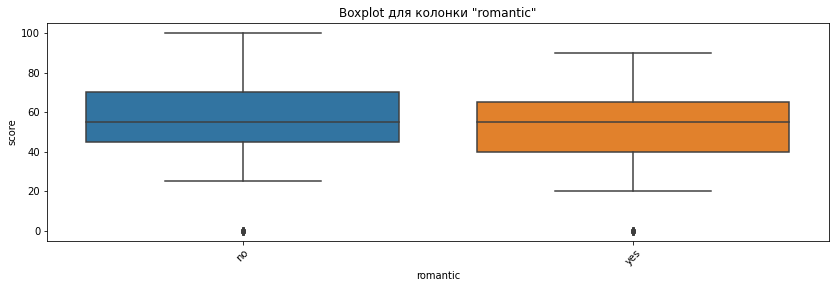

In [64]:
desnom(stud.romantic)

##### Снова наглядный пример тому что романтические отношения переживания и мысли о любви всегда отвлекают от поставленных целей и задач особенно когда они преобладают в юношеском возрасте и вместо того что бы подпитывать друг друга на совершение каких то подвигов к несчастью только разлагают собранность и ответственный подход к учебному процессу. 

## Вот мы и закончили первичный анализ, настало время для  определения нужных нам признаков которые  на наш  взгляд исходя из вывода который мы сделали для каждого признака в частности 

##### Числовые признаки:

In [65]:
corr = pd.DataFrame(stud.corr()['score'])
corr = corr.loc[corr['score'] != 1]
corr.reset_index()
corr

,score
age,-0.186365
mother_education,0.236624
father_education,0.147237
travel_time,-0.079050
study_time,0.106022
failures,-0.353763
family_relations,0.037203
free_time,0.000407
go_out,-0.147853
health,-0.070854


##### Исходя с  этой таблицы мы видим положительные и  отрицательные  стороны наших числовых признаков, меня все еще  смущает  колонка absences и ее не достоверная  информационная  сторона о  которой я  высказал  свои сомнения но этот признак ни как нельзя исключать из нашего будущего дата сета  так как здравый смысл  говорит о том что  он на прямую должен быть связан с оценками и успеваемостью учащихся !Его значения возможно были собраны с ошибками и требуется дополнительная проверка. Аналогично  с колонкой health, которая напрямую должна отображать пропуски при условии что здоровье учащегося плохое в соответствии чего должен иметь пропуски что в большинстве случаев их просто нет.

In [66]:
# Добавим столбец с со значением коэффициента корреляции по модулю для визуального сравнения.
corr = corr.assign(abs_score = lambda x: abs(x['score']))
# Отберем критерии, чей коэффициент по модулю больше 0.048(это цифра взята исключительно потому что я не хочу выкидывать признак absences)abs_scores = corr.loc[corr['abs_score'] >= .048].sort_values(by='abs_score', ascending=False)
abs_scores

,score,abs_score
failures,-0.353763,0.353763
mother_education,0.236624,0.236624
age,-0.186365,0.186365
go_out,-0.147853,0.147853
father_education,0.147237,0.147237
study_time,0.106022,0.106022
travel_time,-0.079050,0.079050
health,-0.070854,0.070854
absences,0.048780,0.048780


##### И так мы отобрали наши числовые признаки.

## Подведем итоги по числовым признакам и добавим их  в наш новый дата сет.

In [67]:
model = []
model = abs_scores.index.tolist()
model

['failures',
 'mother_education',
 'age',
 'go_out',
 'father_education',
 'study_time',
 'travel_time',
 'health',
 'absences']

##### Категориальных признаки:

##### Воспользуемся тестом Стьюдента

In [68]:
selected_columns = {}
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                          stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue
        if ttest<= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки "{}" ({})'.format(column, ttest))
            selected_columns[column] = ttest
            break

for col in nomcol:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки "sex" (0.03825723138487058)
Найдены статистически значимые различия для колонки "address" (0.04267763196406841)
Найдены статистически значимые различия для колонки "mother_job" (0.004030890516939178)
Найдены статистически значимые различия для колонки "guardian" (0.007250036101365638)
Найдены статистически значимые различия для колонки "school_support" (0.04089189005460087)
Найдены статистически значимые различия для колонки "higher" (0.0009291142516159133)
Найдены статистически значимые различия для колонки "romantic" (0.020216919524729024)


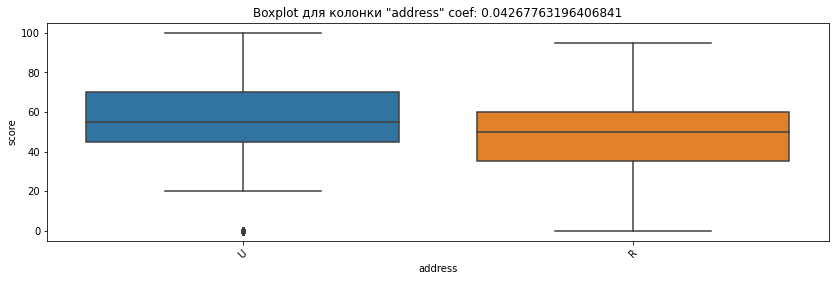

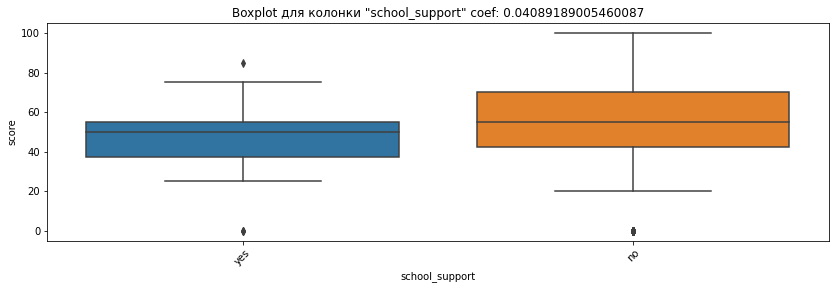

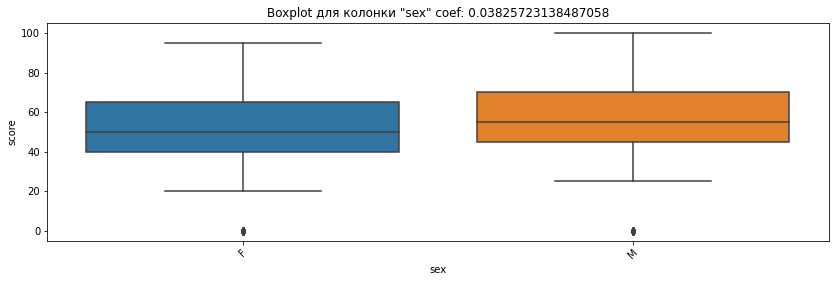

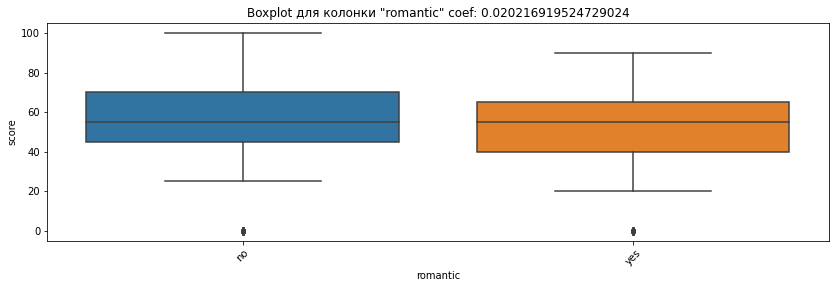

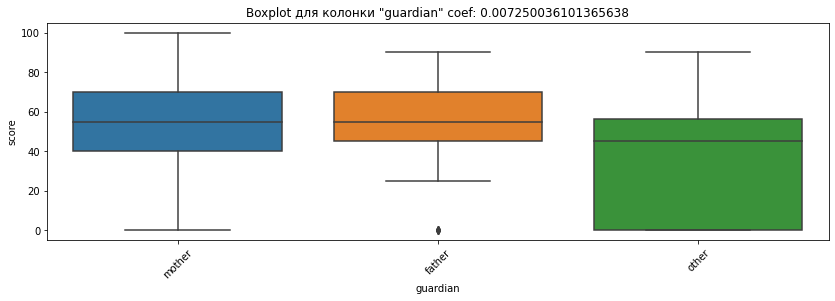

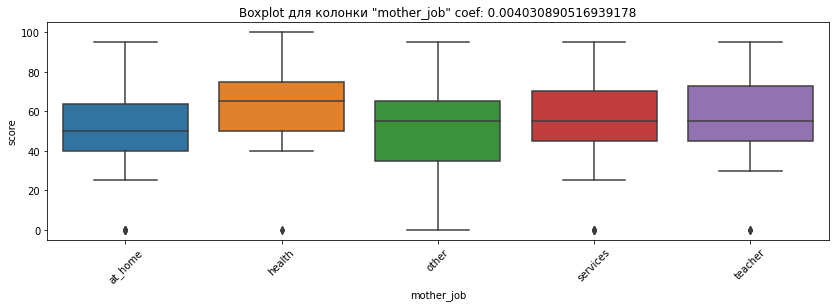

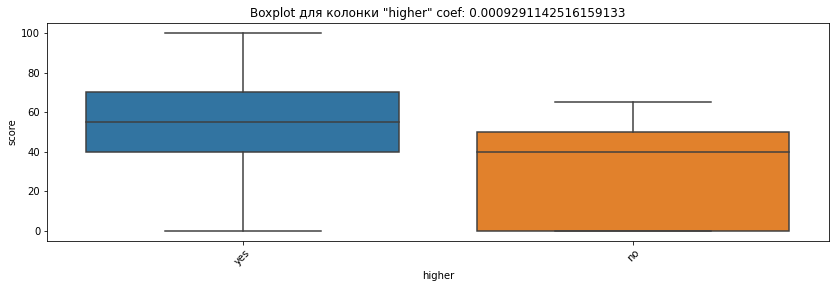

In [69]:
sortcol = sorted(selected_columns.items(), key=lambda x: x[1], reverse=True)

for col in sortcol:
    boxplot(col[0], col[1])

##### После анализа категориальных критериев мы видим следующую картину:
* Благодаря тесту  Стьюдента мы  исключили ненужные нам признаки.
* Один из  признаков  у  меня  вызывает особое мнение это mother_job
##### хочу  обратить  внимание  на  то   что  признак mother_job не является информативным  по  причине того  что  он  внутри  самого признака  несет  логическую ошибку сравнения частных примеров информации о рабочем месте матери с  обобщенным признаком other  который  содержит в  себе  все виды возможных работ которые существуют! исходя из  этого  для модели  я  подберу  две группы  признаков как на  мой  взгляд подходящих по  здравому смыслу и тот  что  определила математика ) Хочу заметить  что  тест Стьюдента  по  какой  то  причине  не  рассмотрел  аналогичный признак father_job и  буду  вынужден в  следствии  своих  суждений сказанных выше, включить  в одну из  моделей  

##### Добавим  нашу  первую  модель

In [71]:
model.extend([col[0] for col in sortcol])
model.append('score')
model.append('father_job')

model

['failures',
 'mother_education',
 'age',
 'go_out',
 'father_education',
 'study_time',
 'travel_time',
 'health',
 'absences',
 'address',
 'school_support',
 'sex',
 'romantic',
 'guardian',
 'mother_job',
 'higher',
 'score',
 'father_job']

In [72]:
stud_model = stud[model].copy()
stud_model

,failures,mother_education,age,go_out,father_education,study_time,travel_time,health,absences,address,school_support,sex,romantic,guardian,mother_job,higher,score,father_job
0,0.0,4.0,18,4.0,4.0,2.0,2.0,3.0,6.0,U,yes,F,no,mother,at_home,yes,30.0,teacher
1,0.0,1.0,17,3.0,1.0,2.0,1.0,3.0,4.0,U,no,F,no,father,at_home,yes,30.0,other
2,3.0,1.0,15,2.0,1.0,2.0,1.0,3.0,10.0,U,yes,F,NaN,mother,at_home,yes,50.0,other
3,0.0,4.0,15,2.0,2.0,3.0,1.0,5.0,2.0,U,no,F,yes,mother,health,yes,75.0,NaN
4,0.0,3.0,16,2.0,3.0,2.0,1.0,5.0,4.0,U,no,F,no,father,other,yes,50.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.0,2.0,20,4.0,2.0,2.0,1.0,4.0,21.2,U,no,M,no,NaN,services,yes,45.0,services
391,0.0,3.0,17,5.0,1.0,1.0,2.0,2.0,3.0,U,no,M,no,mother,services,yes,80.0,services
392,3.0,1.0,21,3.0,1.0,1.0,1.0,3.0,3.0,R,NaN,M,no,NaN,other,NaN,35.0,other
393,0.0,3.0,18,1.0,2.0,1.0,3.0,5.0,0.0,R,no,M,no,mother,services,yes,50.0,other


##### Добавим вторую модель

In [74]:
model2 = []
model2 = abs_scores.index.tolist()
model2.extend([col[0] for col in sortcol])
model2.append('score')
model2.remove('mother_job')
model2.remove('absences')
model2.remove('health')

model2

['failures',
 'mother_education',
 'age',
 'go_out',
 'father_education',
 'study_time',
 'travel_time',
 'address',
 'school_support',
 'sex',
 'romantic',
 'guardian',
 'higher',
 'score']

In [75]:
stud_model2 = stud[model2].copy()
stud_model2

,failures,mother_education,age,go_out,father_education,study_time,travel_time,address,school_support,sex,romantic,guardian,higher,score
0,0.0,4.0,18,4.0,4.0,2.0,2.0,U,yes,F,no,mother,yes,30.0
1,0.0,1.0,17,3.0,1.0,2.0,1.0,U,no,F,no,father,yes,30.0
2,3.0,1.0,15,2.0,1.0,2.0,1.0,U,yes,F,NaN,mother,yes,50.0
3,0.0,4.0,15,2.0,2.0,3.0,1.0,U,no,F,yes,mother,yes,75.0
4,0.0,3.0,16,2.0,3.0,2.0,1.0,U,no,F,no,father,yes,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.0,2.0,20,4.0,2.0,2.0,1.0,U,no,M,no,NaN,yes,45.0
391,0.0,3.0,17,5.0,1.0,1.0,2.0,U,no,M,no,mother,yes,80.0
392,3.0,1.0,21,3.0,1.0,1.0,1.0,R,NaN,M,no,NaN,NaN,35.0
393,0.0,3.0,18,1.0,2.0,1.0,3.0,R,no,M,no,mother,yes,50.0


##### я  удалил  3  признака:
* mother_job - по  причине  логической  ошибки в отношении к score и как  указал  выше, взглянуть можно в подведении  итогов категориальных признаков 
* absences и health - удалил  по  причине тоже  упомянутой выше взглянуть можно в графе подведении итогов  

## Подведем итоги:

* В  датасете очень  много пропусков, я пытался на черновике найти какую то  связь  между ними, но мои исследования оказались четными. Было 2 столбца с  пропусками более 10%  процентов но оснований произвести  замену NaN  не нашлось, это были признаки: paid (10.1) parents_status (11.4)
* Пропуски NaN в  важном  признаке score я решил  приравнять к 0, т.к  выбрасывать  остальную  статистику было бы не логично.
* Выбросы: 1.family_relations - произведена замена -1 на 1(Предположение-опечатка) 2.father_education - произведена замена 40 на 4(Предположение-опечатка) 3.absences - произведена замена 385 и 212 на 38.5 и 21.2 соответственно(Предположение - явная опечатка т.к ученик не мог пропустить  больше учебных дней в году в  первом случае, у  второго просто низкая успеваемость но  прпустив 212 дней сомневаюсь  что можно  вообще быть  допущенным к госэкзамену )

#### Очень  сильно  взволновал момент с признаком  absences и health:
* Каким то образом пропуски положительно влияют на общую тенденцию успеваемости
* касательно пустых значений рисуется не полная картина, наблюдая их состояние здоровья у учеников которых пропущены эти значения происходит некая коллизия
* наблюдая весь дата сет закрадываются в голову сомнения о его достоверности
* ученики имея плохое состояние здоровья  health не имеют ни одного пропуска и проводят экзамен на отлично набирая 95 баллов как нам известно это может работать в обратном порядке когда здоровье отличное, иметь много пропусков "прогулов" и иметь соответствующую оценку в районе 50 баллов.
* делаю вывод что это очень важный признак но как таковых выводов на нем сейчас делать не представляется возможным в связи не добросовестным сбором данных который вводит в заблуждение 
#### В целом конкретные замечания изложены в  подробном разборе  всех  признаков в  частности в связи с  этим  было принято следующее решение:

#### Для построения модели было  выбранно 2 группы  с определенными признаками:
* stud_model - общая модель, исходя из математических ресурсов данного общего анализа
['failures', 'mother_education', 'age', 'go_out', 'father_education', 'study_time', 'travel_time', 'address','school_support','sex','romantic','guardian','higher','score','mother_job','father_job','health','absences']
* stud_model2 - частная модель, исходя из личных выводов основанные на логическом заключении здравого смысла.
['failures', 'mother_education', 'age', 'go_out', 'father_education', 'study_time', 'travel_time', 'address','school_support','sex','romantic','guardian','higher','score']
#### соответствующее описание  вы можете   рассмотреть выше в самом начале проекта